Pandelis Ziazopoulos  (larryziazo@gmail.com) - Data Scientist / Physicist


##Download the data and set the appropriate environment

In [1]:
# install kaggle environment and upload from your computer the kaggle.json file (the API you had created before)
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"larryziazo","key":"5e530ac9e87857b615306f961c7a2bbb"}'}

In [2]:
# make a directory and download the data files for this kaggle competition
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

#if another competition then change the last argument of the command below
! kaggle competitions download -c titanic
! ls

mkdir: cannot create directory ‘/root/.kaggle’: File exists
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
 gender_submission.csv	'kaggle (3).json'   submission.csv
'kaggle (1).json'	 kaggle.json	    test.csv
'kaggle (2).json'	 sample_data	    train.csv


In [3]:
# import the basic libraries to open and take a look at the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, learning_curve, train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
import math
from collections import Counter


## Get to know the data - take a quick look

In [4]:
# pandas is the best way to take a quick look of the data
train_set = pd.read_csv("train.csv")
prediction_set = pd.read_csv("test.csv")
N = len(train_set)
NN = len(prediction_set)

In [5]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# print some basic information about the problem
print("Number of passengers : ", N)
print()

print("Passenger without validated cabin for their name : ", train_set['Cabin'].isna().sum() )
print()
print("People embarked from Cherbourg : ", Counter(list(train_set['Embarked']))['C'])
print("People embarked from Queenstown : ", Counter(list(train_set['Embarked']))['Q'])
print("People embarked from Southampton: ", Counter(list(train_set['Embarked']))['S'])
print("People with no embarkation port : ", N - Counter(list(train_set['Embarked']))['S'] - Counter(list(train_set['Embarked']))['Q'] - Counter(list(train_set['Embarked']))['C'])

Number of passengers :  891

Passenger without validated cabin for their name :  687

People embarked from Cherbourg :  168
People embarked from Queenstown :  77
People embarked from Southampton:  644
People with no embarkation port :  2


In [7]:
# define a function that will help you plot the variables in order to see the balance (or imbalance) of the variables
def plot_bar(dictionary, title):
  a_dictionary = dictionary
  keys = a_dictionary.keys()
  values = a_dictionary.values()
  plt.bar(keys, values)
  plt.title(title)
  return


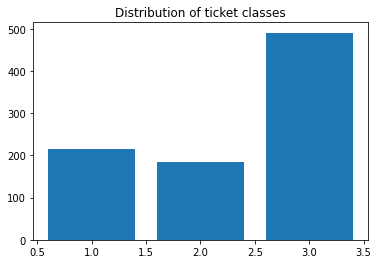

In [8]:
plot_bar(Counter(list(train_set['Pclass'])), "Distribution of ticket classes")

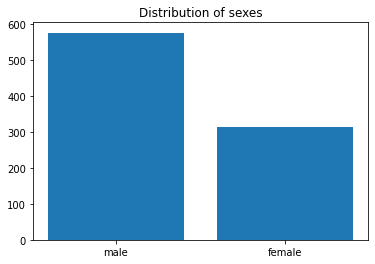

In [9]:
plot_bar(Counter(list(train_set['Sex'])), "Distribution of sexes")

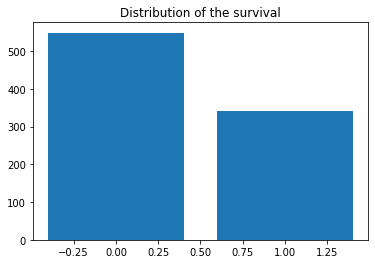

In [10]:
plot_bar(Counter(list(train_set['Survived'])), "Distribution of the survival")

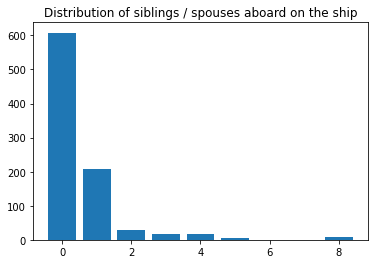

In [11]:
plot_bar(Counter(list(train_set['SibSp'])), "Distribution of siblings / spouses aboard on the ship")

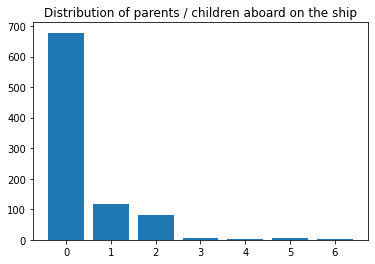

In [12]:
plot_bar(Counter(list(train_set['Parch'])), "Distribution of parents / children aboard on the ship")

In [13]:
# x-data
def from_panda_to_x(dataframe):
  x1 = np.array(list(dataframe['Pclass']))
  x2 = np.array(list(dataframe['Sex']))
  x3 = np.array(list(dataframe['Age']))
  x4 = np.array(list(dataframe['SibSp']))
  x5 = np.array(list(dataframe['Parch']))
  x6 = np.array(list(dataframe['Ticket']))
  x7 = np.array(list(dataframe['Fare']))
  x8 = np.array(list(dataframe['Cabin']))
  x9 = np.array(list(dataframe['Embarked']))
  x_data = [x1,x2,x3,x4,x5,x6,x7,x8,x9]
  return x1,x2,x3,x4,x5,x6,x7,x8,x9,x_data

x1,x2,x3,x4,x5,x6,x7,x8,x9,x_data = from_panda_to_x(train_set)
# y-data
y = np.array(list(train_set['Survived']))


# mark with CAPS the data of the final test set
X1,X2,X3,X4,X5,X6,X7,X8,X9,X_data = from_panda_to_x(prediction_set)
# y-data
# there are no y-data for the final test for this task


In [14]:
# check the types of all values of the variables in order to see if all values are of the same type
def variable_type_checker(variable):
  counter = 0
  different_types = []
  for i in variable:
    if type(i) == type(variable[0]):
      pass
    else:
      counter +=1
    if type(i) in different_types:
      pass
    else:
      different_types.append(type(i))
  return counter , different_types


In [15]:
for j in x_data:
  print(variable_type_checker(j))

print()
print()

for j in X_data:
  print(variable_type_checker(j))


(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.float64'>])
(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.float64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.str_'>])


(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.float64'>])
(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.int64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.float64'>])
(0, [<class 'numpy.str_'>])
(0, [<class 'numpy.str_'>])


## Data cleaning - setting the right format for the data to be processed

In [16]:
import re 
x6_numerical = []
problems = [] # keep track of the problematic values (the indices)
counter = 0
for i in range(N):
  ticket_number = re.findall('\d+', x6[i])
  if len(ticket_number) > 0 :
    x6_numerical.append(int(ticket_number[-1]))

  # keep track of the problematic values
  else:
    counter +=1
    problems.append(i)
    # keep the nan values as they are, in order to keep the arrangement of the values between the different variables
    x6_numerical.append(x6[i])

print(len(x6) == len(x6_numerical)) # check that all are ok till now, in order to change the variable from x6 to x6_numerical
print()

print("Number of problems with the ticket number : ", len(problems))
print()

pd.set_option("display.max_rows", None, "display.max_columns", None)
for i in problems:
  print(train_set.loc[i])
  print()  

True

Number of problems with the ticket number :  4

PassengerId                    180
Survived                         0
Pclass                           3
Name           Leonard, Mr. Lionel
Sex                           male
Age                             36
SibSp                            0
Parch                            0
Ticket                        LINE
Fare                             0
Cabin                          NaN
Embarked                         S
Name: 179, dtype: object

PassengerId                             272
Survived                                  1
Pclass                                    3
Name           Tornquist, Mr. William Henry
Sex                                    male
Age                                      25
SibSp                                     0
Parch                                     0
Ticket                                 LINE
Fare                                      0
Cabin                                   NaN
Embarked        

In [17]:
# follow the same process for the final test data 
X6_numerical = []
PROBLEMS ,counter = [], 0
for i in range(NN):
  ticket_number = re.findall('\d+', X6[i])
  if len(ticket_number) > 0 :
    X6_numerical.append(int(ticket_number[-1]))
  else:
    counter +=1
    PROBLEMS.append(i)
    X6_numerical.append(X6[i])
print(len(X6) == len(X6_numerical))


True


In [18]:
# turn string type variable to integer
x2_numerical = []
counter = 0
for i in x2:
  if i == 'male':
    x2_numerical.append(0)
  elif i == 'female':
    x2_numerical.append(1)
  else:
    counter +=1
print(counter)
print(len(x2) == len(x2_numerical))

X2_numerical = []
counter = 0
for i in X2:
  if i == 'male':
    X2_numerical.append(0)
  elif i == 'female':
    X2_numerical.append(1)
  else:
    counter +=1
print(len(X2) == len(X2_numerical))


0
True
True


In [19]:
x9_numerical = []
counter = 0
for i in range(N):
  if x9[i] == 'C':
    x9_numerical.append(0)
  elif x9[i] == 'Q':
    x9_numerical.append(1)
  elif x9[i] == 'S':
    x9_numerical.append(2)
  else:
    counter +=1
    x9_numerical.append(x9[i]) # 2 nan values
    problems.append(i)
print(counter)
print(len(x9) == len(x9_numerical))


X9_numerical = []
counter = 0
for i in range(NN):
  if X9[i] == 'C':
    X9_numerical.append(0)
  elif X9[i] == 'Q':
    X9_numerical.append(1)
  elif X9[i] == 'S':
    X9_numerical.append(2)
  else:
    counter +=1
    X9_numerical.append(X9[i]) # 2 nan values
    PROBLEMS.append(i)
print(len(X9) == len(X9_numerical))


2
True
True


In [20]:
# for convenience let's round the float variables to integers 
# (if final accuracy is insufficient at the end we will return to the actual float values)
x3_int = []
counter = 0
for i in x3:
  if np.isnan(i):
    x3_int.append(i)
    counter += 1
  else:
      x3_int.append(int(np.round(i)))
print("Number of people without recorded age : ", counter)
print()

x7_int = []
counter = 0
for i in x7:
  if np.isnan(i):
    x7_int.append(i)
    counter += 1
  else:
    x7_int.append(int(np.round(i)))
print("Number of people without recorded fare (zero fare {0$} is regarded as recorded fare) : ", counter)
print()


Number of people without recorded age :  177

Number of people without recorded fare (zero fare {0$} is regarded as recorded fare) :  0



In [21]:
# Same process for the final test data 
X3_int = []
counter = 0
for i in X3:
  if np.isnan(i):
    X3_int.append(i)
    counter += 1
  else:
      X3_int.append(int(np.round(i)))

X7_int = []
counter = 0
for i in X7:
  if np.isnan(i):
    X7_int.append(i)
    counter += 1
  else:
    X7_int.append(int(np.round(i)))

We see that there are plenty of people without recorded age. We suspect that the age variable is a crucial one so we do not want to drop this variable, not the values that are Nan.So, for every Nan value, we arbitrarily append to him/her a random age.

In [22]:
import random
# make a list with the number of ages without the nan values in order to be able to randomly select ages from this list
x3_int_nonzero = []
for i in x3_int:
  if np.isnan(i):
    pass
  else:
    x3_int_nonzero.append(i)

for i in range(N):
  # find the nan values
  if np.isnan(x3_int[i]):
    x3_int[i] = random.choice(x3_int_nonzero)
  else:
    pass

# Same for final test data
X3_int_nonzero = []
for i in X3_int:
  if np.isnan(i):
    pass
  else:
    X3_int_nonzero.append(i)
for i in range(NN):
  if np.isnan(X3_int[i]):
    X3_int[i] = random.choice(X3_int_nonzero)
  else:
    pass


For the time being, the variable x8 (cabin) will be passed by due to the many Nan values. In case it is needed later we will take it into account later on.

In [23]:
all_train_data = np.array([x1,np.array(x2_numerical),np.array(x3_int),x4,x5,np.array(x6_numerical),np.array(x7_int),np.array(x9_numerical),np.array(y) ])
all_train_dataframe = pd.DataFrame(all_train_data)
# the variable passengerid is taken into account only for the final tst set since it is needed only for the submission file we will create later
all_test_data = np.array([X1,np.array(X2_numerical),np.array(X3_int),X4,X5,np.array(X6_numerical),np.array(X7_int),np.array(X9_numerical), list(prediction_set['PassengerId'])])
all_test_dataframe = pd.DataFrame(all_test_data)

all_train_dataframe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890
0,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3,2,2,3,1,3,3,3,1,3,3,1,1,3,2,1,1,3,3,3,3,3,2,3,2,3,3,3,3,3,3,3,3,1,2,1,1,2,3,2,3,3,1,1,3,1,3,2,3,3,3,2,3,2,3,3,3,3,3,2,3,3,3,3,1,2,3,3,3,1,3,3,3,1,3,3,3,1,1,2,2,3,3,1,3,3,3,3,3,3,3,1,3,3,3,3,3,3,2,1,3,2,3,2,2,1,3,3,3,3,3,3,3,3,2,2,2,1,1,3,1,3,3,3,3,2,2,3,3,2,2,2,1,3,3,3,1,3,3,3,3,3,2,3,3,3,3,1,3,1,3,1,3,3,3,1,3,3,1,2,3,3,2,3,2,3,1,3,1,3,3,2,2,3,2,1,1,3,3,3,2,3,3,3,3,3,3,3,3,3,1,3,2,3,2,3,1,3,2,1,2,3,2,3,3,1,3,2,3,2,3,1,3,2,3,2,3,2,2,2,2,3,3,2,3,3,1,3,2,1,2,3,3,1,3,3,3,1,1,1,2,3,3,1,1,3,2,3,3,1,1,1,3

In [24]:
# pop out all the problematic 'passengers' (columns with nan or other values)
for i in problems:
  all_train_dataframe.pop(i)
for i in PROBLEMS:
  all_test_dataframe.pop(i)

print(all_train_dataframe.shape)
print(all_test_dataframe.shape) # no y values -> 1 column less


(9, 885)
(9, 418)


In [25]:
#make rows columns and columns rows
all_train_dataframe = all_train_dataframe.transpose()
all_test_dataframe = all_test_dataframe.transpose()
# from the final test we cannot drop the nan values since the submission file MUST have specific length (exactly as the test set given)
all_test_dataframe = all_test_dataframe.fillna(0) 

# convert all values from string to integers
all_train_dataframe = all_train_dataframe.astype(int)
all_test_dataframe = all_test_dataframe.astype(int)

# separate the last column as the y-values
y_data = all_train_dataframe.pop(8)
# the passenger id values are needed for the final submission
passenger_id = all_test_dataframe.pop(8) 
print(all_train_dataframe.shape)
print(y_data.shape)

# 885

(885, 8)
(885,)


## Split the data - Get ready the classifiers



In [26]:
# splitting the data
def train_dev_test_splitter(X,Y,fraction=0.2,seed=1):
    x_nontest, xxx_test, y_nontest, yyy_test = train_test_split(X,Y,stratify=Y,random_state=seed, test_size=fraction)
    return x_nontest, y_nontest, xxx_test, yyy_test

#x_nontest, y_nontest, x_test, y_test = train_dev_test_splitter(all_train_dataframe, y_data, fraction=0.15,seed=2)


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

classifier_names = ["Logistic Regression", "Nearest Neighbour", "Decision Tree", "Random Forest",#"MLP",
                    "AdaBoost","Naive Bayes"]#, "Linear SVM"] # SVM is a very "heavy" classifier -> makes the code slower

classifiers = [LogisticRegression(C=1, max_iter=200),
              KNeighborsClassifier(10),
              DecisionTreeClassifier(max_depth=15),
              RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1),
              #MLPClassifier(alpha=1, max_iter=1000),
              AdaBoostClassifier(),
              GaussianNB()]
              #,SVC(kernel="linear", C=0.025)]


In [28]:
# define a function that wil iterate over the classifiers many times
# and as a result we will consider the mean of the scores for each classifier

def get_test_scores(x_data, y_data, classifiers , names, n_iterations=1):
  all_acc , all_f1 = [], []
  for i in range(n_iterations):
    xtrain, ytrain, xtest, ytest = train_dev_test_splitter(x_data, y_data, fraction=0.1, seed = i)
    acc_scores, f1_scores = [], []
    all_predictions = []
    for name, classifier in zip(names, classifiers):
      classifier.fit(xtrain, ytrain)
      predictions = classifier.predict(xtest)
      f1score = f1_score(predictions, ytest)
      accuracy = accuracy_score(predictions, ytest)
      #loss = log_loss(predictions, ytest)
      f1_scores.append(f1score)
      acc_scores.append(accuracy)
      #all_predictions.append(predictions)
    all_f1.append(f1_scores)
    all_acc.append(acc_scores)
    # always put a 'print message' when running many iteration in order to know that the colab has not stopped running and that everything is good 
    print("the classification of ", name, " has finished for iteration ", i)
  return all_acc,all_f1


## Train the classifiers and get the scores 

In [29]:
acc, f1 = get_test_scores(all_train_dataframe, y_data, classifiers, classifier_names, n_iterations=20)
final_scores = pd.DataFrame([np.mean(f1, axis=0), np.mean(acc, axis=0)])
final_scores.index= ['F1' ,'Acc']
final_scores.columns = classifier_names
final_scores = final_scores.transpose()

the classification of  Naive Bayes  has finished for iteration  0
the classification of  Naive Bayes  has finished for iteration  1
the classification of  Naive Bayes  has finished for iteration  2
the classification of  Naive Bayes  has finished for iteration  3
the classification of  Naive Bayes  has finished for iteration  4
the classification of  Naive Bayes  has finished for iteration  5
the classification of  Naive Bayes  has finished for iteration  6
the classification of  Naive Bayes  has finished for iteration  7
the classification of  Naive Bayes  has finished for iteration  8
the classification of  Naive Bayes  has finished for iteration  9
the classification of  Naive Bayes  has finished for iteration  10
the classification of  Naive Bayes  has finished for iteration  11
the classification of  Naive Bayes  has finished for iteration  12
the classification of  Naive Bayes  has finished for iteration  13
the classification of  Naive Bayes  has finished for iteration  14
the c

In [30]:
final_scores

,F1,Acc
Logistic Regression,0.103500,0.628652
Nearest Neighbour,0.485434,0.654494
Decision Tree,0.726806,0.794382
Random Forest,0.722534,0.802247
AdaBoost,0.734598,0.798876
Naive Bayes,0.310034,0.662360


In [31]:
# so Random Forest and AdaBoost are the hiest scoring classifiers

## Get the final predictions

In [32]:
def get_data_return_predictions(classifier, train_data = all_train_dataframe, ytrain = y_data, test_data = all_test_dataframe):
  classifier.fit(train_data, ytrain)
  return classifier.predict(test_data)

In [33]:
# the highest scoring classifiers
RandomForest_predictions = get_data_return_predictions(classifiers[3])
AdaBoost_predictions = get_data_return_predictions(classifiers[4])


In [45]:
# check the format of the csv file that MUST have
pd.read_csv('gender_submission.csv').head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
RandomForest_submission = pd.DataFrame()
RandomForest_submission['PassengerId'] = passenger_id
RandomForest_submission['Survived'] = RandomForest_predictions
RandomForest_submission.to_csv('submission.csv', index=False)

! kaggle competitions submit -c titanic -f submission.csv -m "Message"


In [ ]:
AdaBoost_submission = pd.DataFrame()
AdaBoost_submission['PassengerId'] = passenger_id
AdaBoost_submission['Survived'] = AdaBoost_predictions
AdaBoost_submission.to_csv('submission.csv', index=False)

! kaggle competitions submit -c titanic -f submission.csv -m "Message"
# 0.74641 ~ 150 position at the leaderboard


## One step further - Simple hyperparameter tuning for Random Forest classifier


In [38]:
# define the hyperparameter values 

criterion = ['gini', 'entropy']
max_depth = [None, 3, 5, 10, 15]
min_samples_split = [2, 5 , 10]
min_samples_leaf = [1,2,5]
min_weight_fraction_leaf = [0. , 0.2]
max_leaf_nodes = [None , 2]
n_estimators = [10, 50 , 100]

# grid search over all combinations - save the highest F1 scoring set
best_f1_score = 0
counter = 0
x_nontest, y_nontest, x_test, y_test = train_dev_test_splitter(all_train_dataframe, y_data, fraction=0.1,seed=1)
for a in criterion :
  for b in max_depth:
    for c in min_samples_split:
      for d in min_samples_leaf:
        for e in min_weight_fraction_leaf:
          for f in max_leaf_nodes:
            for g in n_estimators:
              gridsearch_classifier = RandomForestClassifier(criterion = a, max_depth = b, min_samples_split = c ,
                                                             min_samples_leaf = d , min_weight_fraction_leaf = e , 
                                                             max_leaf_nodes = f , n_estimators = g )
              gridsearch_classifier.fit(x_nontest, y_nontest)
              preds = gridsearch_classifier.predict(x_test)
              f1 = f1_score(preds, y_test)
              if f1 > best_f1_score:
                best_f1_score = f1
                best_parameters = a,b,c,d,e,f,g
              
              # in order to check that everything runs, and there is no problem (has not crashed, etc.)
              counter += 1
              if counter % 50 == 0: 
                print (" All ok till now ! ", counter ) 


 All ok till now !  50
 All ok till now !  100
 All ok till now !  150
 All ok till now !  200
 All ok till now !  250
 All ok till now !  300
 All ok till now !  350
 All ok till now !  400
 All ok till now !  450
 All ok till now !  500
 All ok till now !  550
 All ok till now !  600
 All ok till now !  650
 All ok till now !  700
 All ok till now !  750
 All ok till now !  800
 All ok till now !  850
 All ok till now !  900
 All ok till now !  950
 All ok till now !  1000
 All ok till now !  1050


In [46]:
print(best_f1_score)
print()
for i in best_parameters:
  print(i)

0.819672131147541

gini
15
5
1
0.0
None
50


The F1 score from 0.722534 before hyperparameter tuning went up to 0.819672 after it. Almost 10% HIGHER !!!

In [40]:
final_classifier = RandomForestClassifier(criterion = best_parameters[0], 
                                          max_depth = best_parameters[1],
                                          min_samples_split = best_parameters[2] ,
                                          min_samples_leaf = best_parameters[3] ,
                                          min_weight_fraction_leaf = best_parameters[4] , 
                                          max_leaf_nodes = best_parameters[5] ,
                                          n_estimators = best_parameters[6] )

final_predictions = get_data_return_predictions(final_classifier)
final_submission = pd.DataFrame()
final_submission['PassengerId'] = passenger_id
final_submission['Survived'] = final_predictions
final_submission.to_csv('submission.csv', index=False)


In [41]:
! kaggle competitions submit -c titanic -f submission.csv -m "Message"
# even better ! 0.75598 Score ~ 145 at the leaderboard 


100% 2.77k/2.77k [00:00<00:00, 13.2kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
# Last thought ... make hyperparameter tuning for the DecisionTree classifier